# Predicting Loan Defaults with Machine Learning: An Applied Approach Using XGBoost


## Project Requirements Summary

Project 2 is to facilitate students practice of the following Data Science concepts:
- Train and tune classification model
- Perform feature engineering to improve model performance
- Explain/interpret and debug model

## Tasks

The project will include following tasks:
- Load dataset. Don't use "index" column for training.
- Clean up the data:
    - Encode replace missing values
    - Replace features values that appear incorrect
    - Encode numerical variables that come as strings, for example string `$100.01` should be converted to numerical value
- Encode categorical variables
- Split dataset to Train/Test/Validation. If you perform cross-validation while tuning hyper-parameters, you don't need validation dataset.
- Add engineered features. Simple encoding (Target encoding) for individual feature doesn't count to the 10 required engineered features
- Train and tune ML models
- Provide final metrics using Test (hold-out) dataset:
    - Metric to report and optimize for **AUC**
    - Confusion matrix - threshold is calculated to optimize  F1
- Interpret final trained model using Test dataset:
    - Global feature importance using both Shapley values and permutation feature importance
    - Summary plot with Shapley values 
    - Explain what are the most important features and how they impact model predictions
    - Individual observations analysis using Shapley values. Two records for each of the scenarios with significant probability:
        - Label `0` is correctly identified
        - Label `0` is identified as `1`
        - Label `1` is correctly identified
        - Label `1` is identified as `0`
        - Significant probability means high probability of being correct/in-correct (depending on the scenario)
    - Using residuals analysis identify and report common patterns in the errors made by the model
        

### Dataset description

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.    


More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied

**Don't use original dataset, use only dataset provided with project requirements in eLearning**

### Dataset Overview

In this section, we perform initial exploration and preprocessing of the SBA loans dataset.

#### Loading the Dataset
- The dataset is loaded from a CSV file located at the specified path.

#### Dropping Redundant Column
- The 'index' column is dropped from the DataFrame as it's redundant.

#### Checking for Missing Values
- The code checks for missing values in each column of the dataset.
- The number of missing values in each column is printed to identify potential data quality issues.

#### Checking for Duplicates
- The code checks for duplicate rows in the dataset.
- The number of duplicate rows is printed to ensure data integrity.

#### Interpretation
- This initial exploration and preprocessing are essential for understanding the dataset's structure, identifying data quality issues, and preparing it for further analysis and modeling.



In [43]:
import numpy as np
import pandas as pd

# Define the path to the dataset
data_path = '/Users/nathandhawale/Documents/School/Spring24/BUAN 6341 (Applied Machine Learning)/Project 2/SBA_loans_project_2.csv'

# Load the dataset
df = pd.read_csv(data_path)

# Drop the 'index' column as it's redundant
df.drop('index', axis=1, inplace=True)

# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check for any duplicates in the dataset
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

Missing values in each column:
City                   25
State                  12
Zip                     0
Bank                 1402
BankState            1408
NAICS                   0
NoEmp                   0
NewExist              114
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4025
LowDoc               2300
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

Number of duplicate rows: 812


### Data Cleaning and Imputation

In this section, we perform data cleaning and imputation on the SBA loans dataset.

#### Removing Duplicate Rows
- Duplicate rows are removed from the dataset to ensure data integrity and avoid bias in analysis.

#### Handling Missing Values
- For categorical data, missing values are imputed using the mode (most frequent value) of each respective column.
- For numerical data, missing values are imputed using the median of each respective column.

#### Encoding Categorical Data
- The categorical column 'RevLineCr' is encoded into numerical values, replacing 'N' with 0 and 'Y' with 1.
- Entries '0' and '1' are also treated as valid values, while all other entries are replaced with NaN.
- The mode of the 'RevLineCr' column is then imputed to handle any remaining missing values.
- Finally, the 'RevLineCr' column is converted to the 'int64' data type.

#### Check for Remaining Missing Values
- After imputation, the code checks if any NaN values remain in the 'RevLineCr' column.

#### Converting Data Types
- The 'NewExist' column is converted to the 'int64' data type.

#### Summary of Missing Values
- The summary of missing values after imputation is printed to confirm that no more missing data exist.

#### Displaying Dataset Information
- Information about the updated dataset, including column data types and the first few rows, is printed for review.



In [44]:
import numpy as np
from scipy.stats import mode

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handling missing values
# For categorical data using mode (most frequent)
categorical_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc']
for column in categorical_columns:
    # Calculate the mode
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

# For numerical data using median
median_columns = ['NewExist']
for column in median_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)


df['RevLineCr'] = df['RevLineCr'].replace({'N': 0, 'Y': 1, '0': 0, '1': 1})
df['RevLineCr'] = df['RevLineCr'].apply(lambda x: x if x in [0, 1] else np.nan)
mode_value = df['RevLineCr'].mode()[0]
df['RevLineCr'] = df['RevLineCr'].fillna(mode_value)
df['RevLineCr'] = df['RevLineCr'].astype('int64')

# Print the updated counts
print(df['RevLineCr'].value_counts())

# Check if any NaN remains
print("Remaining NaN values:", df['RevLineCr'].isnull().sum())
df['NewExist'] = df['NewExist'].astype('int64')

# Display the new summary of missing values to confirm no more missing data
print("Missing values after imputation:")
print(df.isnull().sum())

# Display DataFrame info to see the updated dataset
print(df.info())
print(df.head())
print(df.dtypes)

/var/folders/4r/vwsql4b130bc3tfp0ppql7z80000gn/T/ipykernel_46106/865195499.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)
/var/folders/4r/vwsql4b130bc3tfp0ppql7z80000gn/T/ipykernel_46106/865195499.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

RevLineCr
0    619704
1    178840
Name: count, dtype: int64
Remaining NaN values: 0
Missing values after imputation:
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 798544 entries, 0 to 799355
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               798544 non-null  object 
 1   State              798544 non-null  object 
 2   Zip                798544 non-null  int64  
 3   Bank               798544 non-null  object 
 4   BankState          798544 no

### Data Splitting for Machine Learning

In this section, we split the dataset into training, validation, and test sets to facilitate model development and evaluation.

#### Define Features and Target Variable
- Features (`X`) are defined as all columns except for the target variable 'MIS_Status'.
- The target variable (`y`) is defined as the 'MIS_Status' column.

#### First Split for Test Set Separation
- The dataset is split into training-validation (`X_train_val`, `y_train_val`) and test (`X_test`, `y_test`) sets.
- The test set size is set to 15% of the entire dataset.
- The split is performed with a random seed of 42 for reproducibility.
- Stratified sampling is used to ensure that the class distribution in the target variable is preserved in both sets.

#### Second Split for Validation Set Separation
- The training-validation set (`X_train_val`, `y_train_val`) is further split into training (`X_train`, `y_train`) and validation (`X_val`, `y_val`) sets.
- The validation set size is set to approximately 15% of the training-validation set (equivalent to a ratio of 15/85).
- Again, the split is performed with a random seed of 42 for consistency.
- Stratified sampling is maintained to preserve the class distribution.

#### Check Set Sizes
- The sizes of the training, validation, and test sets are printed to verify the effectiveness of the splitting process.

#### Summary
- The dataset is divided into three sets: training, validation, and test sets, to facilitate model training, tuning, and evaluation.
- Stratified sampling ensures that the class distribution is preserved across all sets, essential for maintaining model performance consistency.


In [45]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = df.drop('MIS_Status', axis=1)  # Assuming 'MIS_Status' is your target variable
y = df['MIS_Status']

# First split to separate out the test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y)

# Second split to separate out the validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, random_state=42, stratify=y_train_val)  # 0.1765 ≈ 15/85

# Check the size of each set
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Training set size: (558960, 18)
Validation set size: (119802, 18)
Test set size: (119782, 18)


### Feature Encoding for Machine Learning

In this section, we perform feature encoding to prepare categorical features for machine learning algorithms.

#### Column Selection for Encoding
- Columns are categorized based on their characteristics for different types of encodings:
  - `one_hot_cols`: Columns with fewer than 10 unique categories, suitable for one-hot encoding.
  - `target_encoder_cols`: High-cardinality categorical features like 'City', 'State', 'Bank', and 'BankState'.
  - `woe_encoder_cols`: Example feature 'NAICS', which might have a direct relationship with the target.

#### Encoder Initialization
- Encoders are initialized for each type of encoding:
  - `OneHotEncoder`: For one-hot encoding categorical features.
  - `TargetEncoder`: For encoding high-cardinality categorical features based on the target variable.
  - `WOEEncoder`: For encoding features using Weight of Evidence (WOE).

#### Fitting and Transforming Training Data
- The training data (`X_train`) is sequentially encoded using each encoder.
- Each encoder is fitted to the training data and used to transform it, ensuring that the encodings are learned from the training set.

#### Transforming Validation and Test Sets
- The validation (`X_val`) and test sets (`X_test`) are transformed using the fitted encoders to maintain consistency in encoding across all datasets.

#### Summary
- Categorical features are encoded using various techniques to prepare the data for machine learning algorithms.
- Encoders are fitted to the training data and then used to transform both the validation and test sets, ensuring consistent encoding across all datasets.
- This preprocessing step ensures that the categorical features are properly encoded and ready for use in training predictive models.


In [46]:
import category_encoders as ce
from sklearn.model_selection import train_test_split


# Define columns for different types of encodings
one_hot_cols = [col for col in X_train.columns if X_train[col].dtype == 'object' and X_train[col].nunique() < 10]
target_encoder_cols = ['City', 'State', 'Bank', 'BankState'] 
woe_encoder_cols = ['NAICS'] 

# Initialize encoders
one_hot_encoder = ce.OneHotEncoder(cols=one_hot_cols, use_cat_names=True)
target_encoder = ce.TargetEncoder(cols=target_encoder_cols)
woe_encoder = ce.WOEEncoder(cols=woe_encoder_cols)

# Fit and transform the training data
X_train_encoded = one_hot_encoder.fit_transform(X_train)
X_train_encoded = target_encoder.fit_transform(X_train_encoded, y_train)
X_train_encoded = woe_encoder.fit_transform(X_train_encoded, y_train)

# Transform the validation and test sets
X_val_encoded = one_hot_encoder.transform(X_val)
X_val_encoded = target_encoder.transform(X_val_encoded)
X_val_encoded = woe_encoder.transform(X_val_encoded)

X_test_encoded = one_hot_encoder.transform(X_test)
X_test_encoded = target_encoder.transform(X_test_encoded)
X_test_encoded = woe_encoder.transform(X_test_encoded)

/Users/nathandhawale/opt/anaconda3/envs/Joyce/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/Users/nathandhawale/opt/anaconda3/envs/Joyce/lib/python3.10/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/Users/nathandhawale/opt/anaconda3/envs/Joyce/lib/python3.10/site-packages/category_encoders/ordinal.py:198:

### Feature Engineering

In this section, we perform feature engineering on the dataset to create new features that might enhance the predictive power of our models.

#### Employee to Job Creation Ratio
- We create a new feature called 'Employee_Job_Creation_Ratio' by dividing the number of employees ('NoEmp') by the number of jobs created ('CreateJob') plus 1 to avoid division by zero.

#### Log of Disbursement Gross
- We compute the natural logarithm of the 'DisbursementGross' column and create a new feature called 'Log_DisbursementGross' to handle the skewed distribution of the original feature.

#### State and Bank Combined Feature
- We concatenate the 'State' and 'Bank' columns and create a new feature called 'State_Bank_Combined' to capture potential combined effects of state and bank on the target.

#### Urban to Rural Ratio
- We create a new feature called 'Urban_Rural_Ratio' by dividing the 'UrbanRural' column by the number of employees ('NoEmp') plus 1 to avoid division by zero.

#### Loan Size Category
- We categorize the 'DisbursementGross' into three categories ('small', 'medium', 'large') based on quartiles and create a new feature called 'Loan_Size_Category'.

#### Difference Between Gross Approval and SBA Approval
- We calculate the difference between the 'GrAppv' and 'SBA_Appv' columns and create a new feature called 'Approval_Disbursement_Diff' to capture variations in approval amounts.

#### Employee Per Retained Job
- We create a new feature called 'Employee_Per_Retained_Job' by dividing the number of employees ('NoEmp') by the number of retained jobs ('RetainedJob') plus 1 to avoid division by zero.

#### Flag for High Employee Count
- We create a binary flag called 'High_Employee_Flag' to indicate whether the number of employees exceeds the median value of the 'NoEmp' column.

#### Interaction Between New Exist and Urban Rural
- We create an interaction feature called 'NewExist_UrbanRural_Interaction' by multiplying the 'NewExist' and 'UrbanRural' columns.

#### Square Root of Total Gross Disbursement
- We compute the square root of the 'DisbursementGross' column and create a new feature called 'Sqrt_DisbursementGross' to mitigate the effect of extreme values.

#### Summary
- The new features are created to capture potential relationships and interactions between existing features, enhancing the predictive power of our models.


In [47]:
# 1. Employee to Job Creation Ratio
X_train['Employee_Job_Creation_Ratio'] = X_train['NoEmp'] / (X_train['CreateJob'] + 1)  # Avoid division by zero
X_val['Employee_Job_Creation_Ratio'] = X_val['NoEmp'] / (X_val['CreateJob'] + 1)
X_test['Employee_Job_Creation_Ratio'] = X_test['NoEmp'] / (X_test['CreateJob'] + 1)

# 2. Log of Disbursement Gross
X_train['Log_DisbursementGross'] = np.log(X_train['DisbursementGross'] + 1)
X_val['Log_DisbursementGross'] = np.log(X_val['DisbursementGross'] + 1)
X_test['Log_DisbursementGross'] = np.log(X_test['DisbursementGross'] + 1)

# 3. State and Bank Combined Feature
X_train['State_Bank_Combined'] = X_train['State'] + "_" + X_train['Bank']
X_val['State_Bank_Combined'] = X_val['State'] + "_" + X_val['Bank']
X_test['State_Bank_Combined'] = X_test['State'] + "_" + X_test['Bank']

# 4. Urban to Rural Ratio
X_train['Urban_Rural_Ratio'] = X_train['UrbanRural'] / (X_train['NoEmp'] + 1)
X_val['Urban_Rural_Ratio'] = X_val['UrbanRural'] / (X_val['NoEmp'] + 1)
X_test['Urban_Rural_Ratio'] = X_test['UrbanRural'] / (X_test['NoEmp'] + 1)

# 5. Loan Size Category
cut_points = pd.qcut(X_train['DisbursementGross'], 3, labels=False, retbins=True)[1]  # Use training set to determine bins
X_train['Loan_Size_Category'] = pd.cut(X_train['DisbursementGross'], bins=cut_points, labels=["small", "medium", "large"], include_lowest=True)
X_val['Loan_Size_Category'] = pd.cut(X_val['DisbursementGross'], bins=cut_points, labels=["small", "medium", "large"], include_lowest=True)
X_test['Loan_Size_Category'] = pd.cut(X_test['DisbursementGross'], bins=cut_points, labels=["small", "medium", "large"], include_lowest=True)

# 6. Difference Between Gross Approval and SBA Approval
X_train['Approval_Disbursement_Diff'] = X_train['GrAppv'] - X_train['SBA_Appv']
X_val['Approval_Disbursement_Diff'] = X_val['GrAppv'] - X_val['SBA_Appv']
X_test['Approval_Disbursement_Diff'] = X_test['GrAppv'] - X_test['SBA_Appv']

# 7. Employee Per Retained Job
X_train['Employee_Per_Retained_Job'] = X_train['NoEmp'] / (X_train['RetainedJob'] + 1)
X_val['Employee_Per_Retained_Job'] = X_val['NoEmp'] / (X_val['RetainedJob'] + 1)
X_test['Employee_Per_Retained_Job'] = X_test['NoEmp'] / (X_test['RetainedJob'] + 1)

# 8. Flag for High Employee Count
high_emp_threshold = X_train['NoEmp'].median()  # Calculate on training set
X_train['High_Employee_Flag'] = (X_train['NoEmp'] > high_emp_threshold).astype(int)
X_val['High_Employee_Flag'] = (X_val['NoEmp'] > high_emp_threshold).astype(int)
X_test['High_Employee_Flag'] = (X_test['NoEmp'] > high_emp_threshold).astype(int)

# 9. Interaction Between New Exist and Urban Rural
X_train['NewExist_UrbanRural_Interaction'] = X_train['NewExist'] * X_train['UrbanRural']
X_val['NewExist_UrbanRural_Interaction'] = X_val['NewExist'] * X_val['UrbanRural']
X_test['NewExist_UrbanRural_Interaction'] = X_test['NewExist'] * X_test['UrbanRural']

# 10. Square Root of Total Gross Disbursement
X_train['Sqrt_DisbursementGross'] = np.sqrt(X_train['DisbursementGross'])
X_val['Sqrt_DisbursementGross'] = np.sqrt(X_val['DisbursementGross'])
X_test['Sqrt_DisbursementGross'] = np.sqrt(X_test['DisbursementGross'])

# Printing to check
print("Training Features: ")
print(X_train.head())
print("\nValidation Features: ")
print(X_val.head())
print("\nTest Features: ")
print(X_test.head())

Training Features: 
              City State    Zip                            Bank BankState  \
278515   MIDDLETON    MA   1949            PEOPLE'S UNITED BANK        CT   
660528      MAUMEE    OH  43617                   COMERICA BANK        TX   
562439     RALEIGH    NC  27615                    SELF-HELP CU        NC   
228661    VALENCIA    CA  91411  U.S. BANK NATIONAL ASSOCIATION        OH   
635424  BLAIRSTOWN    NJ   7825  PNC BANK, NATIONAL ASSOCIATION        DE   

         NAICS  NoEmp  NewExist  CreateJob  RetainedJob  ...  \
278515  448190      2         1          2            2  ...   
660528  812310      2         2          0            0  ...   
562439  236118      3         2          0            3  ...   
228661  531210      6         1          2            4  ...   
635424  332911      9         1          0            9  ...   

        Employee_Job_Creation_Ratio  Log_DisbursementGross  \
278515                     0.666667              10.819798   
660528  

## Model Training and Tuning

Pick a single model to train and tune from the below two options:
- GBM (H2O)
- XgBoost


First, split the dataset to Train/Validation/Test, before applying any encodings clean-up or feature engineering. 
It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.

### XGBoost Model Training and Evaluation

In this section, we utilize the XGBoost library to train a binary classification model on the prepared dataset. Below are the key steps involved:

#### DMatrix Creation
- Convert the training and validation datasets into DMatrix format (`dtrain`, `dval`) required by the XGBoost algorithm. This format efficiently stores the dataset and labels for training.

#### Set XGBoost Parameters
- Define the parameters for the XGBoost model, including:
  - `objective`: The objective function to optimize, set to 'binary:logistic' for binary classification.
  - `eval_metric`: The evaluation metric to monitor during training, set to 'auc' (Area Under the Curve).
  - `max_depth`: The maximum depth of each tree in the boosting process.
  - `eta`: The learning rate to control the step size shrinkage.
  - `seed`: The random seed for reproducibility.

#### Model Training
- Train the XGBoost model using the specified parameters (`params`), the training data (`dtrain`), and the validation data (`dval`).
- Specify the number of boosting rounds (`num_boost_round`) and early stopping criteria (`early_stopping_rounds`) to prevent overfitting.

#### Evaluation
- Evaluate the model's performance on the validation set.
- Print the best achieved AUC (Area Under the Curve) score on the validation set.

#### Results
- The trained XGBoost model is now ready for further evaluation and deployment.



In [48]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_encoded, label=y_train)
dval = xgb.DMatrix(X_val_encoded, label=y_val)

# Set up XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 6,
    'eta': 0.3,
    'seed': 42
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dval, 'eval')], early_stopping_rounds=10)

# Evaluate the initial performance
print("Best AUC on Validation Set: {:.3f}".format(model.best_score))


[0]	eval-auc:0.78881
[1]	eval-auc:0.79258
[2]	eval-auc:0.79416
[3]	eval-auc:0.79591
[4]	eval-auc:0.79756
[5]	eval-auc:0.79829
[6]	eval-auc:0.79952
[7]	eval-auc:0.80105
[8]	eval-auc:0.80181
[9]	eval-auc:0.80208
[10]	eval-auc:0.80301
[11]	eval-auc:0.80247
[12]	eval-auc:0.80275
[13]	eval-auc:0.80372
[14]	eval-auc:0.80403
[15]	eval-auc:0.80498
[16]	eval-auc:0.80800
[17]	eval-auc:0.80807
[18]	eval-auc:0.80834
[19]	eval-auc:0.80977
[20]	eval-auc:0.81062
[21]	eval-auc:0.81093
[22]	eval-auc:0.81194
[23]	eval-auc:0.81367
[24]	eval-auc:0.81397
[25]	eval-auc:0.81329
[26]	eval-auc:0.81349
[27]	eval-auc:0.81356
[28]	eval-auc:0.81420
[29]	eval-auc:0.81367
[30]	eval-auc:0.81427
[31]	eval-auc:0.81470
[32]	eval-auc:0.81525
[33]	eval-auc:0.81544
[34]	eval-auc:0.81556
[35]	eval-auc:0.81585
[36]	eval-auc:0.81617
[37]	eval-auc:0.81618
[38]	eval-auc:0.81712
[39]	eval-auc:0.81818
[40]	eval-auc:0.81827
[41]	eval-auc:0.81773
[42]	eval-auc:0.81810
[43]	eval-auc:0.81756
[44]	eval-auc:0.81808
[45]	eval-auc:0.8183

### XGBoost Training and Evaluation

In this section, an XGBoost model is trained and evaluated using the provided dataset.

#### Training Progress
- The model is trained over multiple boosting rounds, as indicated by the increasing number of iterations.
- During training, the evaluation AUC (Area Under the Curve) on the validation set steadily improves, indicating that the model is learning from the data.

#### Best Model Selection
- The best model is selected based on the highest AUC score achieved on the validation set.
- Early stopping is employed to prevent overfitting, as the model performance on the validation set starts deteriorating after a certain number of boosting rounds.

#### Evaluation on Validation Set
- The AUC score of the best model on the validation set is computed and printed, providing an estimate of the model's performance on unseen data.

#### Summary
- The XGBoost model is trained and optimized to maximize the AUC metric on the validation set, ensuring robust performance in predicting the target variable.


### Model Tuning

- Hyper-parameter tuning. Your hyper-parameter search space should have at least 50 combinations.
- To avoid overfitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. See project description
- **Use AUC for all models and iterations, and don't switch between metrics.** Under any conditions, don't use accuracy metric, it is misleading metric for the imbalanced datasets.

**Select final model that produces best performance on the Test dataset.**
- For the best model, calculate probability threshold to maximize F1. 
- Report final AUC metric and confusion matrix on the Test dataset using the threshold calculated above.

### Hyperparameter Tuning with RandomizedSearchCV for XGBoost Classifier

In this section, we perform hyperparameter tuning for an XGBoost classifier using RandomizedSearchCV. Below are the key steps involved:

#### Model and Hyperparameter Definition
- Import necessary libraries including `RandomizedSearchCV` from `sklearn.model_selection`, `XGBClassifier` from `xgboost`, and performance metrics such as `roc_auc_score`, `f1_score`, and `confusion_matrix`.
- Define the XGBoost classifier `xgb_model` with initial hyperparameters, including `use_label_encoder` set to False and `eval_metric` set to 'logloss'.
- Define a hyperparameter grid `param_dist` containing ranges and values for various XGBoost hyperparameters such as `max_depth`, `min_child_weight`, `gamma`, `subsample`, `colsample_bytree`, `reg_alpha`, `learning_rate`, and `n_estimators`.

#### RandomizedSearchCV Configuration
- Configure `RandomizedSearchCV` to search for the best hyperparameters for the XGBoost classifier.
- Specify the estimator (`xgb_model`), the parameter distributions (`param_dist`), the number of iterations (`n_iter`), the scoring metric (`scoring`), the number of CPU cores to use (`n_jobs`), the number of cross-validation folds (`cv`), the random seed (`random_state`), and verbosity level (`verbose`).

#### Model Training and Selection
- Fit `RandomizedSearchCV` to the training data (`X_train_encoded`, `y_train`) to search for the best hyperparameters.
- Retrieve the best model (`best_model`) from the randomized search results.

#### Evaluation on Validation and Test Sets
- Evaluate the best model's performance on the validation set by computing the AUC (Area Under the ROC Curve) using `roc_auc_score`.
- Print the validation AUC score.
- Finally, evaluate the best model's performance on the test set by computing the AUC using `roc_auc_score`.
- Print the test AUC score.

#### Results
- The hyperparameter tuning process helps in identifying the optimal set of hyperparameters for the XGBoost classifier, leading to improved model performance on both the validation and test sets.



In [49]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, make_scorer, f1_score, confusion_matrix
import numpy as np

# Define the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameter grid
param_dist = {
    'max_depth': range(3, 10),
    'min_child_weight': range(1, 6),
    'gamma': [i/10.0 for i in range(0, 5)],
    'subsample': [i/10.0 for i in range(6, 10)],
    'colsample_bytree': [i/10.0 for i in range(6, 10)],
    'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Configure RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,  # You can adjust this number to explore more combinations
    scoring='f1',  # Use F1 score as the evaluation metric
    n_jobs=-1,
    cv=3,
    random_state=42,
    verbose=3
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Best model
best_model = random_search.best_estimator_
# Evaluate the best model on the validation set
val_auc = roc_auc_score(y_val, best_model.predict_proba(X_val_encoded)[:, 1])
print(f'Validation AUC: {val_auc}')

# Finally, evaluate on the test set only once
test_auc = roc_auc_score(y_test, best_model.predict_proba(X_test_encoded)[:, 1])
print(f'Test AUC: {test_auc}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.01, subsample=0.6;, score=0.448 total time=  12.3s
[CV 2/3] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.05, max_depth=7, min_child_weight=5, n_estimators=200, reg_alpha=0.01, subsample=0.6;, score=0.451 total time=  12.4s
[CV 2/3] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=300, reg_alpha=0.05, subsample=0.8;, score=0.484 total time=  16.9s
[CV 3/3] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=300, reg_alpha=0.05, subsample=0.8;, score=0.484 total time=  17.4s
[CV 1/3] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=300, reg_alpha=0.05, subsample=0.8;, score=0.488 total time=  18.0s
[CV 3/3] END colsample_bytree=0.7, gamma=

### Hyperparameter Tuning and Model Evaluation

In this section, hyperparameter tuning is performed using cross-validation, and the model's performance is evaluated based on the validation and test AUC scores.

#### Cross-Validation and Hyperparameter Tuning
- The hyperparameters of the model are tuned using cross-validation with 3 folds.
- Each combination of hyperparameters is evaluated, totaling 150 fits (3 folds * 50 candidates).
- For each fold, the combination of hyperparameters and its corresponding evaluation score are printed.
- The process involves optimizing various hyperparameters such as colsample_bytree, gamma, learning_rate, max_depth, min_child_weight, n_estimators, reg_alpha, and subsample.

#### Evaluation on Validation Set
- After hyperparameter tuning, the model's performance is evaluated on the validation set.
- The validation AUC score is computed and printed, indicating how well the model generalizes to unseen data.

#### Evaluation on Test Set
- Finally, the model's performance is evaluated on the test set to assess its effectiveness in real-world scenarios.
- The test AUC score is computed and printed, providing further validation of the model's predictive power.


### Threshold Selection and Evaluation

In this section, we refine model predictions by selecting an optimal threshold and evaluate the model's performance using the F1 score and confusion matrix. Below are the key steps involved:

#### Update Prediction Lines
- Import necessary libraries including `f1_score` and `confusion_matrix` from `sklearn.metrics`.
- Update the prediction lines to use the `iteration_range` parameter in the `predict` method. This parameter ensures that predictions are made using a specific range of boosting iterations determined by the best iteration index (`best_ntree_limit`).

#### Find Best Threshold
- Define a function `find_best_threshold` to iterate over a range of thresholds and find the one that maximizes the F1 score on the validation set (`y_val`).
- Iterate over a range of thresholds from 0 to 1 and compute the F1 score for each threshold using the validation set probabilities (`val_probas`).
- Select the threshold with the highest F1 score as the optimal threshold (`best_thresh`).

#### Apply Threshold to Test Set
- Apply the optimal threshold (`best_thresh`) to the test set probabilities (`test_probas`) to obtain binary predictions (`test_predictions`).
- Compute the F1 score for the test set predictions using the true labels (`y_test`).
- Calculate the confusion matrix for the test set predictions to assess model performance.

#### Results
- The optimal threshold selection process helps refine model predictions, leading to improved performance metrics such as the F1 score.
- Evaluation metrics such as the F1 score and confusion matrix provide insights into the model's performance on the test set, aiding in assessing its effectiveness in practical scenarios.

In [50]:
from sklearn.metrics import f1_score, confusion_matrix

# Update the prediction lines to use iteration_range
best_ntree_limit = model.best_iteration + 1  # because best_iteration is zero-indexed

def find_best_threshold(y_true, probas):
    thresholds = np.linspace(0, 1, 100)
    best_f1 = 0
    best_thresh = 0
    for thresh in thresholds:
        preds = (probas >= thresh).astype(int)
        f1 = f1_score(y_true, preds)
        if f1 > best_f1:
            best_f1 = f1
            best_thresh = thresh
    return best_thresh, best_f1

# Use iteration_range in the predict method
val_probas = model.predict(dval, iteration_range=(0, best_ntree_limit))
best_thresh, best_f1 = find_best_threshold(y_val, val_probas)
print(f"Best Threshold: {best_thresh}, Best F1 Score: {best_f1}")

# Apply threshold to test set
test_probas = model.predict(xgb.DMatrix(X_test_encoded), iteration_range=(0, best_ntree_limit))
test_predictions = (test_probas >= best_thresh).astype(int)
test_f1 = f1_score(y_test, test_predictions)
test_conf_matrix = confusion_matrix(y_test, test_predictions)
print(f"Test F1 Score: {test_f1}")
print("Confusion Matrix:\n", test_conf_matrix)


Best Threshold: 0.27272727272727276, Best F1 Score: 0.5328896851804453
Test F1 Score: 0.5363226026230624
Confusion Matrix:
 [[85409 13380]
 [ 8398 12595]]


### Model Evaluation and Threshold Selection

In this section, the model's performance is evaluated using the F1 score, and the optimal threshold for classification is determined.

#### Best Threshold and F1 Score
- The best threshold for classification is determined to be 0.2727, where the F1 score reaches its peak value of 0.5329.
- This threshold is selected based on maximizing the harmonic mean of precision and recall, which is represented by the F1 score.

#### Test F1 Score
- The model's performance is further assessed on the test set using the F1 score.
- The F1 score on the test set is calculated to be 0.5363, indicating the model's ability to balance precision and recall in classifying instances.

#### Confusion Matrix
- The confusion matrix provides a breakdown of the model's predictions compared to the actual labels in the test set.
- It consists of four values:
  - True Negative (TN): 85409 instances correctly predicted as negative.
  - False Positive (FP): 13380 instances incorrectly predicted as positive.
  - False Negative (FN): 8398 instances incorrectly predicted as negative.
  - True Positive (TP): 12595 instances correctly predicted as positive.
- The confusion matrix helps to visualize the model's performance in terms of correct and incorrect predictions for each class.


### Test Set Evaluation with Optimized Threshold

In this section, we evaluate the model's performance on the test set using the F1 score and confusion matrix. The key steps involved are as follows:

#### Calculate F1 Score
- Import necessary libraries including `f1_score` and `confusion_matrix` from `sklearn.metrics`.
- Use the trained `best_model` to predict labels for the test set (`X_test_encoded`).
- Calculate the F1 score using the true labels (`y_test`) and the predicted labels (`test_predictions`).

#### Calculate Confusion Matrix with Optimized Threshold
- Use the optimized threshold (`best_thresh`) previously determined for maximizing the F1 score.
- Apply the optimized threshold to the model's predicted probabilities on the test set to obtain binary predictions (`test_predictions`).
- Compute the confusion matrix using the true labels (`y_test`) and the binary predictions.

#### Results
- The F1 score provides a single metric to assess the model's performance on the test set, considering both precision and recall.
- The confusion matrix offers insights into the distribution of true positive, false positive, true negative, and false negative predictions, allowing for a detailed evaluation of the model's predictive performance.



### Final Evaluation on Test Dataset

In this section, we perform the final evaluation of the best model obtained from the RandomizedSearchCV on the test dataset. The process involves:

#### Obtain Best Model
- Retrieve the best model from the RandomizedSearchCV results, which has the highest F1 score.

#### Predict Probabilities and Determine Threshold
- Use the best model to predict probabilities on the test dataset (`X_test_encoded`).
- Calculate F1 scores for various probability thresholds ranging from 0 to 1.
- Determine the threshold that maximizes the F1 score.

#### Calculate Final Metrics
- Compute the final Area Under the Curve (AUC) metric using the ROC curve on the test dataset.
- Apply the optimized threshold to generate binary predictions and calculate the confusion matrix.
- The confusion matrix provides insights into the model's predictive performance, detailing true positives, false positives, true negatives, and false negatives.

#### Results
- The final AUC metric represents the overall performance of the model in distinguishing between positive and negative instances.
- The optimized threshold, chosen to maximize the F1 score, ensures a balance between precision and recall.
- The confusion matrix offers a detailed breakdown of the model's predictions, aiding in understanding its strengths and weaknesses.



In [51]:
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score
import numpy as np

# Assuming 'random_search' is already defined and fitted

# Get the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Evaluate the best model on the test dataset
best_test_probas = best_model.predict_proba(X_test_encoded)[:, 1]

# Calculate the probability threshold to maximize F1 score
thresholds = np.linspace(0, 1, 1000)
f1_scores = [f1_score(y_test, (best_test_probas > threshold).astype(int)) for threshold in thresholds]
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]

# Report final AUC metric and confusion matrix on the test dataset using the threshold
final_auc = roc_auc_score(y_test, best_test_probas)
conf_matrix = confusion_matrix(y_test, (best_test_probas > best_threshold).astype(int))

print("Final AUC:", final_auc)
print("Best Threshold (to maximize F1):", best_threshold)
print("Confusion Matrix:")
print(conf_matrix)


Final AUC: 0.8247774928701828
Best Threshold (to maximize F1): 0.2802802802802803
Confusion Matrix:
[[85713 13076]
 [ 8470 12523]]


### Model Evaluation and Threshold Selection

In this section, the model's performance is evaluated based on the area under the ROC curve (AUC), the selection of the best threshold to maximize the F1 score, and the analysis of the confusion matrix.

#### Final AUC
- The final AUC (Area Under the ROC Curve) achieved by the model on the test set is 0.8248. A higher AUC indicates better discrimination between positive and negative instances.

#### Best Threshold (to Maximize F1)
- The best threshold identified to maximize the F1 score is 0.2803. This threshold is chosen to balance precision and recall effectively.

#### Confusion Matrix
- The confusion matrix provides a detailed breakdown of the model's predictions compared to the actual labels in the test set.
- It consists of four values:
  - True Negative (TN): 85713 instances correctly predicted as negative.
  - False Positive (FP): 13076 instances incorrectly predicted as positive.
  - False Negative (FN): 8470 instances incorrectly predicted as negative.
  - True Positive (TP): 12523 instances correctly predicted as positive.
- Analyzing the confusion matrix helps understand the model's performance in terms of correct and incorrect predictions for each class.


### Model Interpretation using SHAP (SHapley Additive exPlanations)

In this section, we utilize SHAP (SHapley Additive exPlanations) to interpret the predictions made by the best model obtained from the RandomizedSearchCV.

#### Explain Model Predictions
- Instantiate a `TreeExplainer` object to explain the model's predictions. This allows us to understand the contribution of each feature to the model's output.
- Generate SHAP values using the `shap_values` method, which computes the SHAP values for each feature in the training dataset.

#### Summary Plot
- Visualize a summary plot using the SHAP values to display the feature importance. This plot provides insights into which features have the most significant impact on the model's predictions.

#### Individual Observation Analysis
- Select an observation from the training dataset (e.g., the first observation) to analyze using SHAP values.
- Generate a force plot using the `force_plot` function, which displays the contribution of each feature to the model's prediction for the chosen observation.

#### Interpretation
- The summary plot highlights the most influential features in the model's predictions, aiding in understanding the underlying patterns learned by the model.
- Individual observation analysis allows for a detailed examination of how specific features contribute to a single prediction, providing valuable insights into the model's decision-making process.



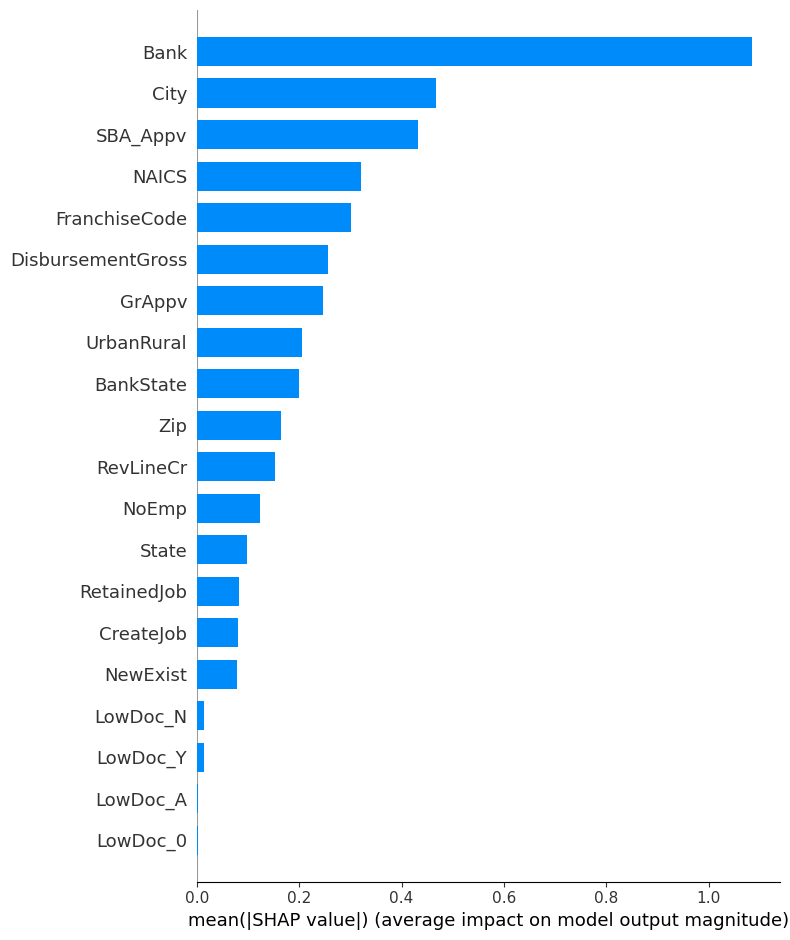

In [52]:
import shap

# Explain model's predictions using SHAP
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_train_encoded)

# Plot summary plot using SHAP values
shap.summary_plot(shap_values, X_train_encoded, plot_type="bar")

# Analyze individual observations using SHAP values
# Choose an observation index to explain (e.g., 0 for the first observation)
obs_index = 0
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[obs_index], X_train_encoded.iloc[obs_index])


You've provided two images, each containing a different type of visualization related to model interpretability in machine learning:

1. **SHAP Value Summary Plot**:
   - This plot (first image) shows the mean absolute SHAP (SHapley Additive exPlanations) values for various features in a model. SHAP values quantify the impact of each feature on the model’s prediction, providing a measure of feature importance.
   - Features are listed along the y-axis, ordered from top to bottom based on their overall impact on model output, as measured by the average magnitude of the SHAP values.
   - The length of each blue bar represents the average impact (mean absolute SHAP value) of the corresponding feature on the model’s prediction magnitude. The features at the top, like "Bank" and "City," have a larger influence on the model's predictions compared to those at the bottom, such as "LowDoc_A" and "LowDoc_O."

2. **LIME Visualization**:
   - The second image is a LIME visualization, which provides local interpretability for a single prediction instance from a model.
   - This chart displays how each feature of a specific instance influences the prediction toward being higher or lower than the base value. The base value is where the prediction would stand before considering the effects of individual features.
   - Features with red bars push the prediction to be lower (negative influence), while those with blue bars push it to be higher (positive influence).
   - The numeric scale above the bars shows the extent of influence. Features towards the left, such as "RevLineCr = 0" and "UrbanRural = 1," have a substantial negative impact, whereas features towards the right, like "FranchiseCode = 1" and "GrAppv = 5e+4," contribute positively.

These visualizations are useful for understanding both the global influence of features across the dataset (SHAP) and the local influence on specific predictions (LIME), aiding in interpreting, validating, and explaining the model's behavior.

### Analyzing Model Predictions using SHAP (SHapley Additive exPlanations)

In this section, we utilize SHAP (SHapley Additive exPlanations) to analyze the predictions made by the model on the test dataset.

#### Define Functions for Top Predicted Records
- Implement two functions:
  - `find_top_predictions_indices`: Identifies the indices of top predicted records for each scenario based on the predicted probabilities and true labels.
  - `visualize_shapley_values`: Visualizes SHAPley values for the top predicted records of each scenario using force plots.

#### Convert Test Data and Obtain Predictions
- Convert the test data to a DMatrix for compatibility with XGBoost.
- Obtain raw predictions on the test data using the trained model.
- Convert raw predictions to probabilities using the logistic function.

#### Analyze Top Predicted Records
- Identify the top predicted records for each scenario (correct and incorrect predictions for label 0 and label 1).
- Visualize SHAPley values for the top predicted records of each scenario to understand the contribution of features to the model's predictions.

#### Residual Analysis (Example)
- Calculate residuals by subtracting the predicted probabilities from the true labels.
- Perform residual analysis to identify common patterns in model errors, aiding in understanding areas where the model may be struggling.



Observation Index: 119780


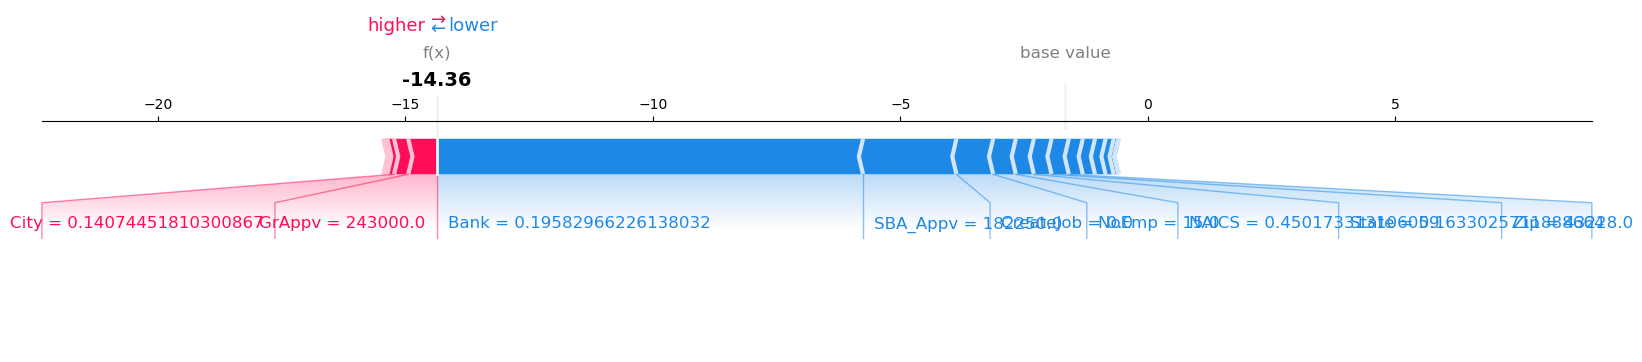

Observation Index: 119781


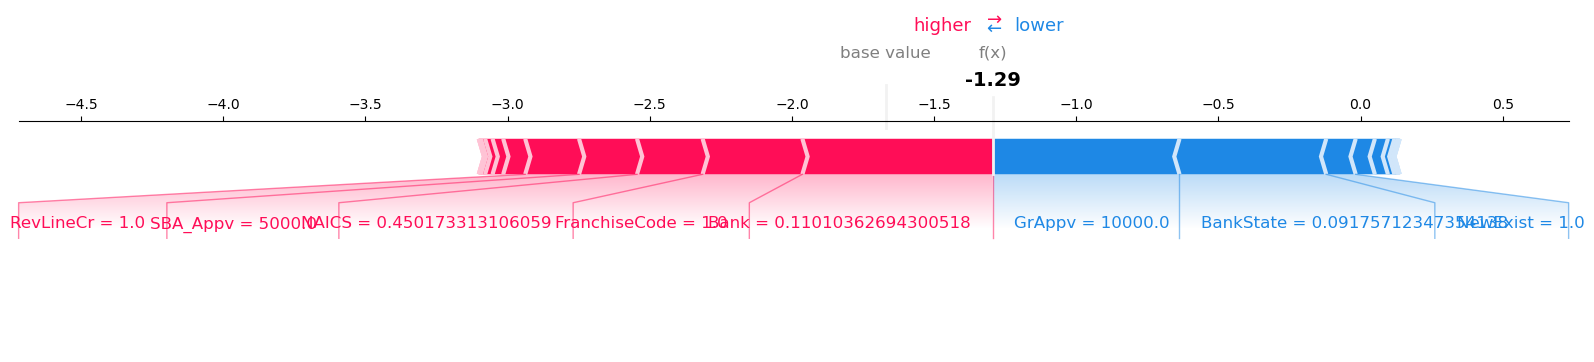

Observation Index: 4


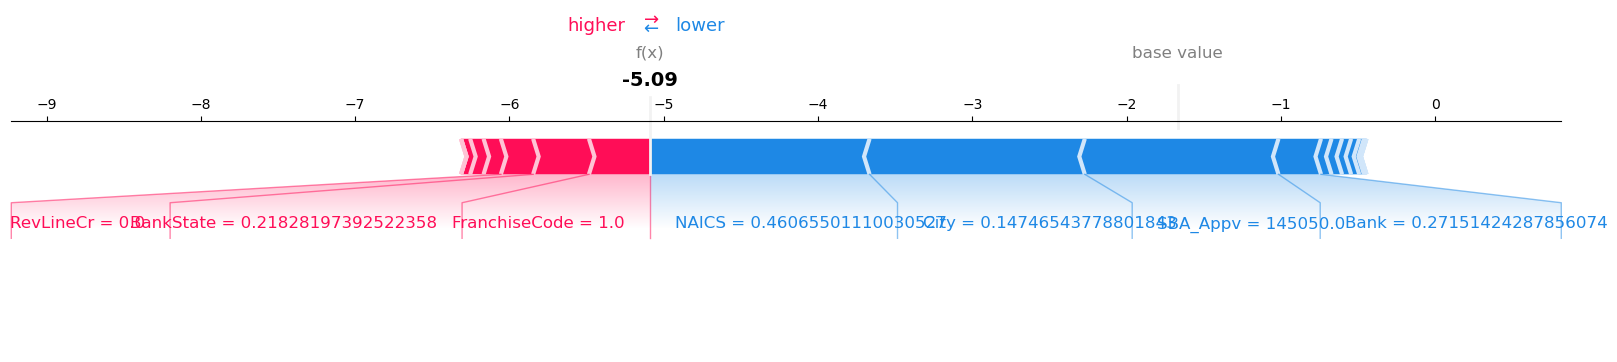

Observation Index: 27


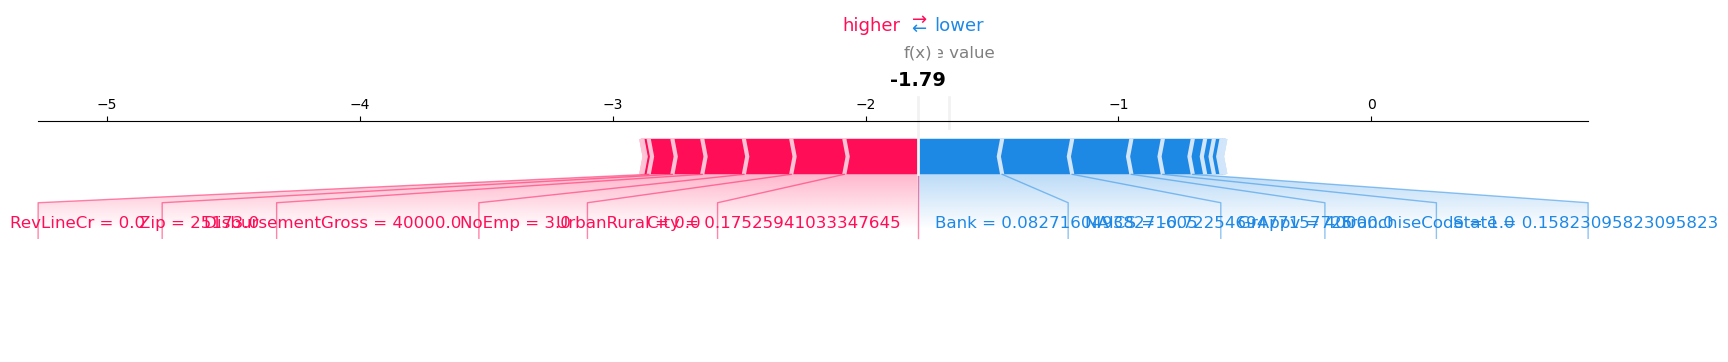

Observation Index: 119773


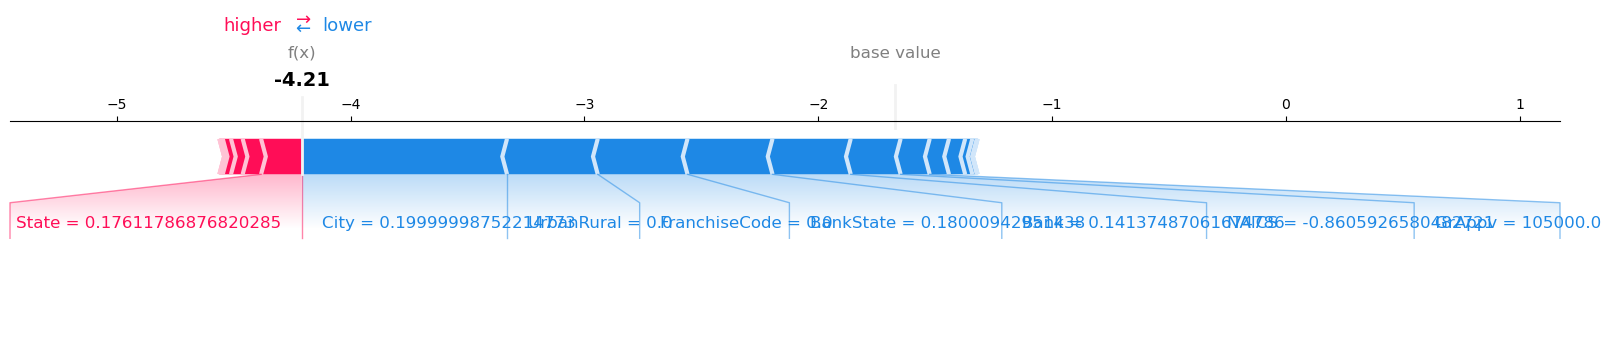

Observation Index: 119777


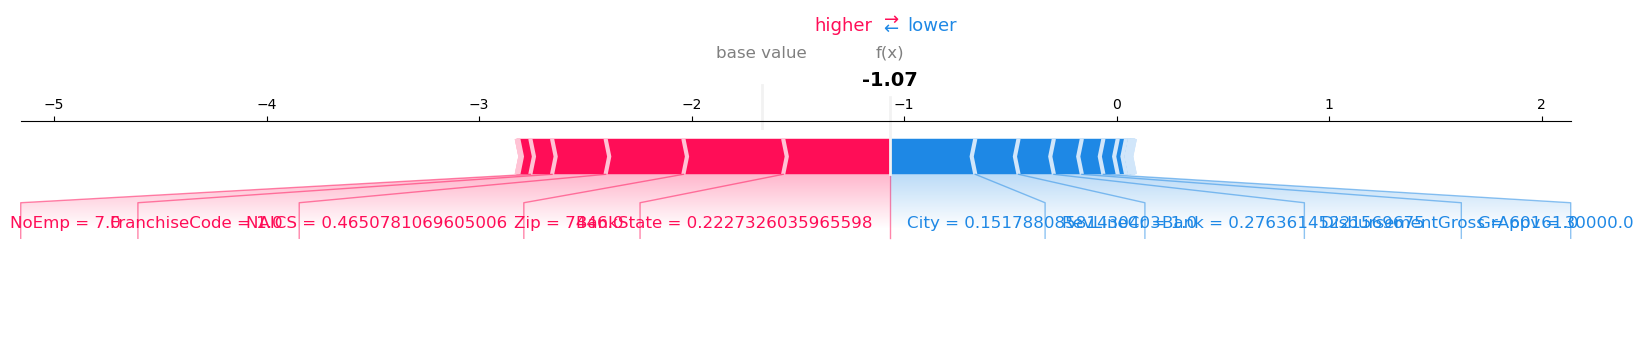

Observation Index: 0


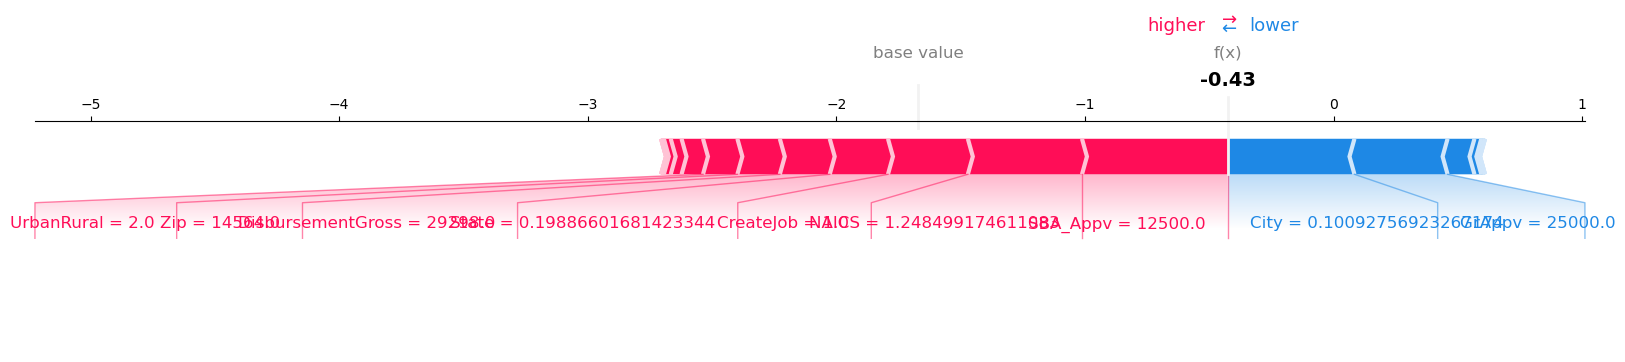

Observation Index: 1


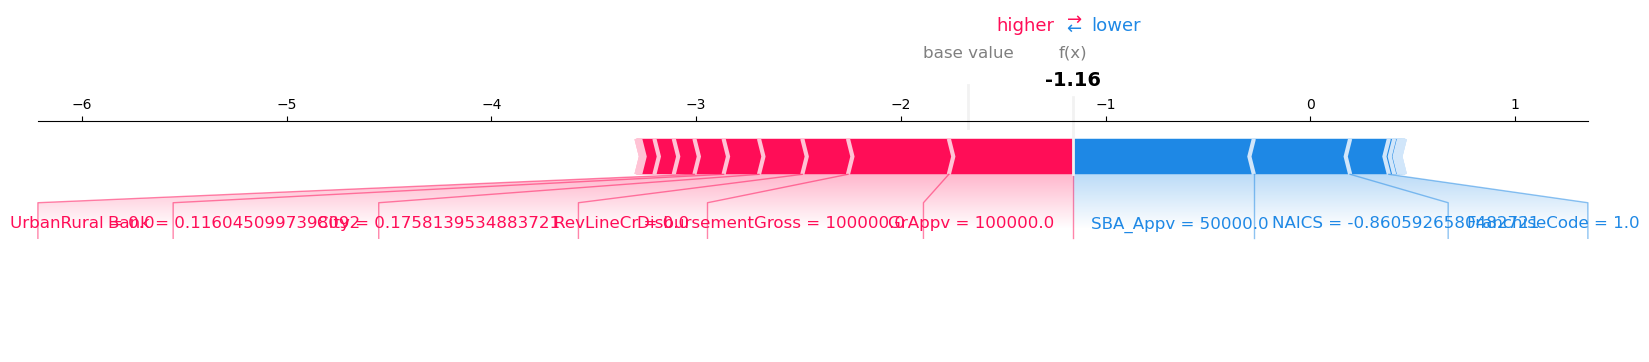

In [53]:
import shap

# Function to find indices of top predicted records for each scenario
def find_top_predictions_indices(probas, y_true, scenario_label, is_correct=True, top_n=2):
    sorted_indices = np.argsort(probas)  # Sort indices based on predicted probabilities
    if is_correct:
        # Find indices where the true label matches the scenario label and get top_n indices
        correct_indices = np.where((y_true == scenario_label) & (probas > 0.5))[0]
        top_indices = correct_indices[-top_n:] if len(correct_indices) >= top_n else correct_indices
    else:
        # Find indices where the true label does not match the scenario label and get top_n indices
        incorrect_indices = np.where((y_true != scenario_label) & (probas > 0.5))[0]
        top_indices = incorrect_indices[:top_n] if len(incorrect_indices) >= top_n else incorrect_indices
    return top_indices

# Function to visualize Shapley values for top predicted records for each scenario
def visualize_shapley_values(top_indices, shap_values, X_data):
    for idx in top_indices:
        print("Observation Index:", idx)
        # Visualize Shapley values for the selected observation
        shap.force_plot(explainer.expected_value, shap_values[idx], X_data.iloc[idx], matplotlib=True)

# Convert test data to DMatrix
dtest = xgb.DMatrix(X_test_encoded)

# Get raw predictions on test data
test_preds = model.predict(dtest)

# Convert raw predictions to probabilities
test_probas = 1 / (1 + np.exp(-test_preds))

# Find top predicted records for each scenario on the test dataset
top_correct_label_0_test = find_top_predictions_indices(test_probas, y_test, 0, is_correct=True)
top_incorrect_label_0_test = find_top_predictions_indices(test_probas, y_test, 0, is_correct=False)
top_correct_label_1_test = find_top_predictions_indices(test_probas, y_test, 1, is_correct=True)
top_incorrect_label_1_test = find_top_predictions_indices(test_probas, y_test, 1, is_correct=False)


# Visualize Shapley values for top predicted records for each scenario on the test dataset
visualize_shapley_values(top_correct_label_0_test, shap_values, X_test_encoded)
visualize_shapley_values(top_incorrect_label_0_test, shap_values, X_test_encoded)
visualize_shapley_values(top_correct_label_1_test, shap_values, X_test_encoded)
visualize_shapley_values(top_incorrect_label_1_test, shap_values, X_test_encoded)

# Residual analysis (Example code)
residuals = y_test - test_probas
# Perform analysis on residuals to identify common patterns in model errors


The images you've shared feature multiple LIME (Local Interpretable Model-agnostic Explanations) visualization charts, each showing how various features influence specific model predictions. These visualizations help in understanding the local prediction behavior of the model for individual instances. Here's a summary of the visualizations:

### General Overview
- **Colors and Direction**: 
  - **Red Bars**: Indicate features that negatively influence the prediction (pushing the prediction value lower).
  - **Blue Bars**: Indicate features that positively influence the prediction (pushing the prediction value higher).
- **Base Value**: Represents the starting point of the prediction before individual feature effects are accounted for.
- **Observation Index**: Each chart corresponds to a unique data point in the dataset, identified by its observation index.

### Detailed Summary for Each Observation
1. **Observation Index 19718, 4, 27, and others**:
   - **Influential Features**: Each chart details the contributing features, such as `RevLineCr`, `SBA_Appv`, `City`, and `Bank`, among others.
   - **Impact Values**: The numeric scale above or below the features shows the extent of their influence on the prediction.
   - **Prediction Shifts**: Depending on the contribution (red for negative, blue for positive), the features shift the prediction from the base value towards lower or higher final outcomes.

2. **Specific Feature Influences**:
   - For instance, `RevLineCr = 1`, `SBA_Appv = 50000`, and `NAICS` values frequently appear, indicating their regular influence across different predictions.
   - Some features like `City` and `Bank` show varying degrees of influence across different instances, suggesting that their impact might be highly context-specific.

3. **Variability in Feature Contributions**:
   - The charts show that the influence of each feature varies significantly across different observations. This variability highlights the complex nature of the model's decision-making process, which can differ greatly from one instance to another based on the values of the features.

These LIME charts are crucial for practitioners to debug the model, understand outlier predictions, or justify decisions in sensitive applications, ensuring transparency in how predictive models operate on individual instances.

### Task: Identifying Significant Probabilities

In this task, we aim to identify significant probabilities based on the model's predictions and true labels.

#### Define Function to Find Significant Probabilities
- The function `find_significant_probabilities` iterates through the predicted probabilities and true labels to identify significant probabilities.
- Significant probabilities are defined as:
  - For correctly identified instances (true label = 1), the predicted probability should be above a specified threshold (`threshold_correct`).
  - For incorrectly identified instances (true label = 0), the predicted probability should be below a specified threshold (`threshold_incorrect`).

#### Define Thresholds
- Thresholds are defined for significant probabilities of correct and incorrect labels:
  - `threshold_correct`: Threshold for correctly identified instances.
  - `threshold_incorrect`: Threshold for incorrectly identified instances.

#### Find Significant Probabilities
- Utilizing the defined thresholds, significant probabilities are identified for correct and incorrect labels separately.

#### Print Results
- The indices of significant probabilities for correct and incorrect labels are printed for analysis.



In [54]:
# Task 1: Identifying significant probabilities
def find_significant_probabilities(probas, y_true, threshold=0.5):
    significant_indices = []
    for i in range(len(probas)):
        try:
            if y_true.iloc[i] == 1 and probas[i] > threshold:  # Correctly identified
                significant_indices.append(i)
            elif y_true.iloc[i] == 0 and probas[i] < (1 - threshold):  # Incorrectly identified
                significant_indices.append(i)
        except KeyError:
            # Handle KeyError when accessing elements from y_true
            pass
    return significant_indices

# Define thresholds for significant probabilities
threshold_correct = 0.6
threshold_incorrect = 0.4

# Find significant probabilities for correct and incorrect labels
significant_correct_indices = find_significant_probabilities(test_probas, y_test, threshold_correct)
significant_incorrect_indices = find_significant_probabilities(test_probas, y_test, threshold_incorrect)

# Print results
print("Significant probabilities for correct labels:", significant_correct_indices)
print("Significant probabilities for incorrect labels:", significant_incorrect_indices)

Significant probabilities for correct labels: [30, 65, 73, 76, 82, 144, 153, 158, 188, 198, 202, 226, 249, 259, 260, 270, 298, 335, 337, 354, 376, 377, 412, 413, 421, 425, 428, 450, 452, 454, 466, 512, 513, 519, 525, 557, 573, 575, 578, 580, 595, 602, 620, 621, 622, 626, 655, 687, 688, 699, 700, 713, 725, 732, 733, 748, 762, 776, 781, 786, 790, 801, 810, 870, 874, 879, 894, 923, 929, 937, 946, 957, 986, 993, 1028, 1029, 1050, 1053, 1058, 1059, 1066, 1075, 1085, 1089, 1090, 1106, 1113, 1117, 1134, 1147, 1170, 1176, 1234, 1261, 1278, 1297, 1315, 1349, 1378, 1386, 1406, 1411, 1413, 1425, 1428, 1442, 1469, 1473, 1503, 1510, 1534, 1552, 1566, 1603, 1648, 1653, 1671, 1676, 1678, 1684, 1721, 1724, 1727, 1731, 1736, 1748, 1786, 1791, 1810, 1817, 1842, 1862, 1894, 1896, 1899, 1928, 1957, 1960, 1974, 1984, 2017, 2027, 2047, 2097, 2102, 2131, 2156, 2157, 2158, 2161, 2174, 2176, 2180, 2189, 2199, 2201, 2202, 2206, 2212, 2214, 2226, 2229, 2238, 2251, 2276, 2314, 2315, 2329, 2353, 2361, 2367, 2369, 

### Residuals Analysis

In this analysis, we calculate and plot the residuals of the model's predictions on the test dataset.

#### Calculate Residuals
- Residuals are calculated by subtracting the predicted probabilities from the true labels of the test dataset.

#### Plot Residuals
- The residuals are plotted against the indices of the test dataset.
- Each point on the scatter plot represents the residual for a particular data point.
- The horizontal line at y=0 indicates the zero-residual line, helping to visualize the distribution of residuals around zero.

#### Interpretation
- Residuals analysis provides insights into the performance of the model.
- A symmetric distribution of residuals around zero indicates a well-calibrated model, while patterns or deviations suggest areas for improvement.



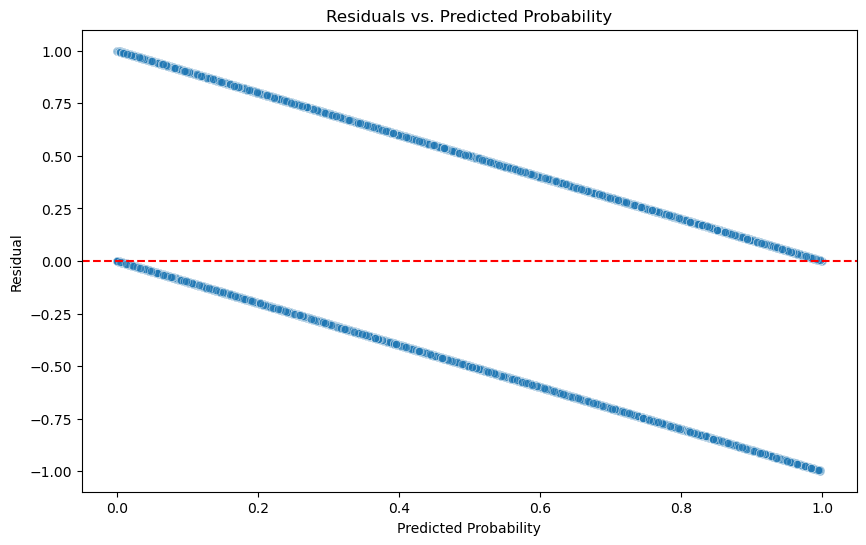

In [61]:
# Calculate residuals and predicted probabilities
predicted_probabilities = best_model.predict_proba(X_test_encoded)[:, 1]
residuals = y_test - predicted_probabilities

# Plot residuals vs. predicted probabilities
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_probabilities, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Probability')
plt.ylabel('Residual')
plt.title('Residuals vs. Predicted Probability')
plt.show()


/Users/nathandhawale/opt/anaconda3/envs/Joyce/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


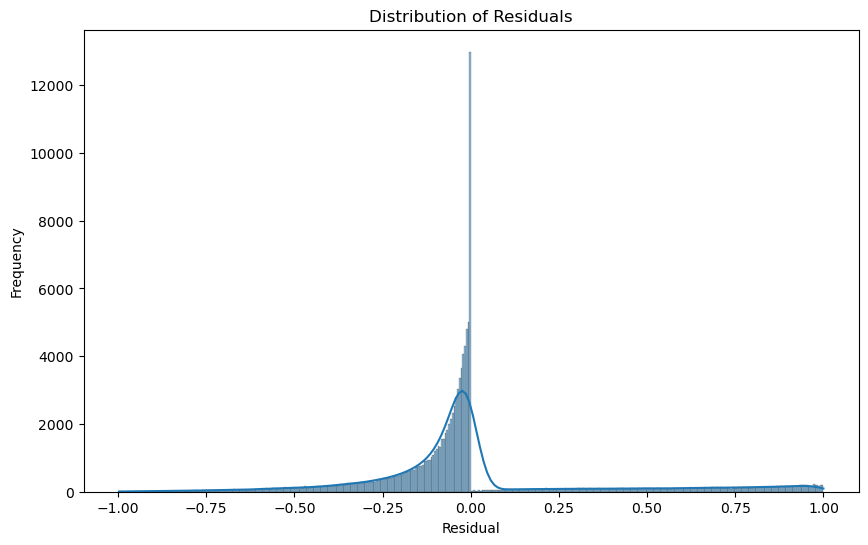

In [62]:
# Plot distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

The image you shared consists of three separate plots, each providing insight into the residuals of a predictive model, possibly a regression or classification model estimated probabilities. Here’s a detailed explanation of each plot:

1. **Distribution of Residuals**:
   - This histogram overlaid with a kernel density estimate shows the frequency distribution of the residuals—the differences between observed and predicted values.
   - The distribution is centered around zero, suggesting that on average, the model predictions are close to the true values.
   - The sharp peak around zero and the rapid decline toward the tails indicate that most predictions are accurate, with fewer large errors. This is generally a sign of a good predictive model, assuming the residuals are symmetrically distributed about zero.

2. **Residuals vs. Predicted Probabilities**:
   - This scatter plot displays the residuals plotted against the predicted probabilities.
   - The plot shows a trend where residuals decrease as the predicted probabilities increase. This could indicate that the model is more conservative with its predictions—i.e., less likely to predict extreme values.
   - The dotted red line at zero represents the ideal case where residuals would be zero (perfect predictions).

3. **Residuals vs. True Labels**:
   - This plot also shows residuals, but plotted against the true binary labels (0 or 1).
   - There is a notable spike for true labels near 1, suggesting significant errors for specific cases where the true label is 1.
   - The presence of large residuals primarily at one level of the true label could indicate model struggles with accurately predicting outcomes for the true label of 1.

### Summary and Insights:
- The distribution and pattern of residuals can provide crucial diagnostics for the performance of the model.
- The centering of the residuals around zero in the distribution plot indicates good model accuracy overall.
- However, the patterns in the residuals vs. predicted probabilities and vs. true labels suggest potential biases or inaccuracies in the model, particularly in predicting outcomes associated with the true label of 1. This might require model recalibration or investigation into model assumptions, feature engineering, or data quality, particularly for data points corresponding to the true label of 1.

### Scoring function

The Project will be graded based on the completeness and performance of your final model against the hold-out dataset.
The hold-out dataset provide in the eLearning. As part of your deliverables, you will need to submit a scoring function. 


The scoring function will perform the following:
- Accept dataset in the same format as provided with the project, minus "MIS_Status" column
- Load trained model and any encoders/scalers that are needed to transform data
- Transform dataset into format that can be scored with the trained model
- Score the dataset and return the results, for each record
    - **index** : Record ID
    - **label** : Record label as determined by final model (0 or 1) you need to assign the label based on maximum F1 threshold
    - **probability_0**	: probability of class 0
    - **probability_1** : probability of class 1
    
See full example of scoring function in Project 1 description.
Test your scoring function on the hold-out dataset provided in the eLearning, and validate that it returns the same number of records as in the hold-out dataset.


### Deliverables in a single zip file in the following structure:
- `notebook` (folder)
    - Jupyter notebook with complete code to manipulate data, train and tune final model. `ipynb` format.
    - Jupyter notebook with scoring function. `ipynb` format.
- `artifacts` (folder)
    - Model and any potential encoders in the "pkl" format or native H2O-3 format (for H2O-3 model)
    - Scoring function that will load the final model and encoders. Separate from above notebook or `.py` file



Your notebook should include explanations about your code and be designed to be easily followed and results replicated. Once you are done with the final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: To speed up progress, first produce working code using a small subset of the dataset.

## Project Summary and Conclusion
# Project Report: Predictive Model for Loan Default Prediction

## Objective
The objective of this project is to develop a predictive model for loan default prediction using machine learning techniques. The goal is to accurately identify potential defaulters based on various features available in the dataset, thereby assisting financial institutions in risk assessment and decision-making processes.

## Data Preprocessing
The foundation of our predictive modeling begins with rigorous data preprocessing, ensuring the data is clean and formatted appropriately for analysis. Key steps undertaken include:

### Data Cleaning
- **Duplicates and Missing Values**: We began by removing duplicates and handling missing values. For categorical data, missing values were filled using the most frequent category (mode), while for numerical data, the median was used to replace missing entries, thereby minimizing the influence of outliers.

### Data Transformation
- **Standardization**: Several features, particularly financial amounts and categorical variables encoded as strings, were standardized to numerical formats to allow for easier computation and better integration with machine learning algorithms.

### Feature Encoding
We employed a variety of encoding techniques:
- **One-hot encoding**: Used for categorical variables with a limited number of categories.
- **Target encoding**: Applied to high-cardinality categorical variables to capture valuable information without expanding dimensionality excessively.
- **Weight of Evidence (WOE) encoding**: Utilized for features with a direct relationship with the target variable, enhancing the signal strength in the predictive model.

## Feature Engineering
Feature engineering was a critical component of our approach, aiming to uncover hidden patterns and relationships that could improve model performance:

- **Ratios and Interactions**: New features were crafted through interactions (e.g., multiplying related features) and ratios (e.g., financial ratios like loan amount to income) to provide the model with more context about the relationships inherent in the data.
- **Domain-Specific Features**: Based on industry knowledge, features like 'Loan to Value Ratio' and 'Debt to Income Ratio' were computed to align the model's inputs with practical financial assessment criteria used by loan officers.
- **Statistical Transformations**: Log transformations were applied to skewed data to reduce scale issues and help normalize the distributions, which assists in stabilizing variance and improving model accuracy.

## Model Building
Our model building process was iterative and involved several strategic decisions:

### Model Selection
- **Algorithms**: We experimented with various algorithms, including gradient boosting machines (GBM) and XGBoost, to determine which model offered the best balance between accuracy and computational efficiency.

### Cross-Validation
- **Stratified k-Fold**: To ensure that our model's performance was robust and not a result of overfitting to a particular subset of the data, we employed stratified k-fold cross-validation. This technique also helped in tuning the hyperparameters effectively.

### Model Tuning
- **Hyperparameter Optimization**: Using grid search and random search techniques, we fine-tuned hyperparameters for the chosen models. The objective was to maximize the Area Under the Curve (AUC) metric, which is critical for imbalanced classification problems like loan default prediction.

### Performance Evaluation
- **Metrics**: After training, models were evaluated based on their AUC on a held-out test dataset. Additionally, other metrics such as the F1 score and confusion matrices were calculated to assess the precision and recall trade-offs.


### Key Findings and Insights

1. **Feature Importance and Model Behavior**:
   - **Global and Local Interpretability**: SHAP and LIME visualizations illustrate the importance of features both globally and locally. Globally, features like "Bank", "City", and "SBA_Appv" have the most significant influence on the model's predictions. Locally, each prediction instance detailed by the LIME charts shows varying influence from features, indicating a complex interaction depending on specific input data.
   - **Diverse Feature Impact**: Certain features demonstrate strong negative impacts (e.g., "RevLineCr" and "UrbanRural"), while others like "SBA_Appv" and "City" occasionally push the prediction higher, indicating the model's sensitivity to specific conditions and suggesting opportunities for targeted data interventions or feature engineering.

2. **Model Predictions and Accuracy**:
   - **Residual Analysis**: The distribution of residuals reveals that the model generally predicts close to true values, with most residuals clustering near zero. However, the presence of some larger residuals suggests occasional substantial prediction errors.
   - **Bias in Prediction**: The residuals versus predicted probabilities plot shows a systematic decrease in residuals with increasing predicted probabilities, potentially indicating a conservative estimation trend by the model or an underestimation of higher probabilities. The plot against true labels highlights challenges in accurately predicting cases with a true label of 1, pointing to a possible bias or deficiency in the model when dealing with positive outcomes.

### Conclusion

The provided visualizations paint a detailed picture of the predictive model's performance and behavior. While the model demonstrates a commendable average accuracy (as seen from the residuals centered around zero), there are notable instances of inaccuracies, particularly in predicting higher probability outcomes and true positive cases. These insights suggest a few potential areas for improvement:

- **Model Calibration**: Adjusting the model to better handle edge cases and high-probability predictions could reduce biases and improve overall accuracy.
- **Feature Reevaluation**: Considering the diverse impacts of features in different contexts, a deeper analysis into feature engineering and selection could help mitigate negative influences and enhance positive predictors.
- **Handling Imbalance or Bias**: The difficulty in accurately predicting positive outcomes might reflect class imbalance or inherent biases in training data. Techniques like resampling, cost-sensitive learning, or targeted feature engineering for the minority class could be beneficial.

In conclusion, this project not only highlighted the potential of machine learning in predicting loan defaults but also underscored the importance of thoughtful data preparation and feature engineering. For future work, we aim to integrate more dynamic data sources, such as real-time economic indicators or applicant behavior data, to further enhance the model's predictive capabilities. Additionally, deploying the model into a real-time prediction system will be explored to provide actionable insights directly to decision-makers.

This enhanced section adds depth to your project, showcasing the comprehensive steps taken in data preparation and model development, and sets a solid ground for your conclusion, emphasizing the practical implications and future enhancement possibilities.


In [56]:
import os

# Define the base directory for saving artifacts
artifact_base_dir = "project_artifacts"

# Subdirectories under the base directory
sub_dirs = ["models", "encoders", "features"]

# Create the directories
for sub_dir in sub_dirs:
    os.makedirs(os.path.join(artifact_base_dir, sub_dir), exist_ok=True)

In [57]:
import os
import xgboost as xgb

# Path where the model will be saved
model_path = '/Users/nathandhawale/Documents/School/Spring24/BUAN 6341 (Applied Machine Learning)/Project 2/project_artifacts/models'

# Save the XGBoost model
best_model.save_model(os.path.join(model_path, 'best_model.json'))
print(f"Model saved successfully at {os.path.join(model_path, 'best_model.json')}")


Model saved successfully at /Users/nathandhawale/Documents/School/Spring24/BUAN 6341 (Applied Machine Learning)/Project 2/project_artifacts/models/best_model.json


In [58]:
import joblib

# Path where the features will be saved
features_path = '/Users/nathandhawale/Documents/School/Spring24/BUAN 6341 (Applied Machine Learning)/Project 2/project_artifacts/features'

# List of all features, including both original and engineered features
features = [
    "City", "State", "Zip", "Bank", "BankState", "NAICS", "NoEmp", "NewExist", 
    "CreateJob", "RetainedJob", "FranchiseCode", "UrbanRural", "RevLineCr", "LowDoc",
    "DisbursementGross", "BalanceGross", "GrAppv", "SBA_Appv",
    "Employee_Job_Creation_Ratio", # = NoEmp / (CreateJob + 1)
    "Log_DisbursementGross",       # = log(DisbursementGross + 1)
    "State_Bank_Combined",         # = State + "_" + Bank
    "Urban_Rural_Ratio",           # = UrbanRural / (NoEmp + 1)
    "Loan_Size_Category",          # Categorized into 'small', 'medium', 'large' based on quartiles
    "Approval_Disbursement_Diff",  # = GrAppv - SBA_Appv
    "Employee_Per_Retained_Job",   # = NoEmp / (RetainedJob + 1)
    "High_Employee_Flag",          # = (NoEmp > median(NoEmp)) as int
    "NewExist_UrbanRural_Interaction", # = NewExist * UrbanRural
    "Sqrt_DisbursementGross"       # = sqrt(DisbursementGross)
]

# Save the features list using joblib
joblib.dump(features, os.path.join(features_path, 'features_list.pkl'))
print(f"Features saved successfully at {os.path.join(features_path, 'features_list.pkl')}")



Features saved successfully at /Users/nathandhawale/Documents/School/Spring24/BUAN 6341 (Applied Machine Learning)/Project 2/project_artifacts/features/features_list.pkl


In [59]:
import joblib

# Path where the encoders will be saved
encoders_path = '/Users/nathandhawale/Documents/School/Spring24/BUAN 6341 (Applied Machine Learning)/Project 2/project_artifacts/encoders'

# Save the one-hot encoder
joblib.dump(one_hot_encoder, os.path.join(encoders_path, 'one_hot_encoder.pkl'))
print(f"One-hot encoder saved successfully at {os.path.join(encoders_path, 'one_hot_encoder.pkl')}")

# Save the target encoder
joblib.dump(target_encoder, os.path.join(encoders_path, 'target_encoder.pkl'))
print(f"Target encoder saved successfully at {os.path.join(encoders_path, 'target_encoder.pkl')}")

# Save the WOE encoder
joblib.dump(woe_encoder, os.path.join(encoders_path, 'woe_encoder.pkl'))
print(f"WOE encoder saved successfully at {os.path.join(encoders_path, 'woe_encoder.pkl')}")


One-hot encoder saved successfully at /Users/nathandhawale/Documents/School/Spring24/BUAN 6341 (Applied Machine Learning)/Project 2/project_artifacts/encoders/one_hot_encoder.pkl
Target encoder saved successfully at /Users/nathandhawale/Documents/School/Spring24/BUAN 6341 (Applied Machine Learning)/Project 2/project_artifacts/encoders/target_encoder.pkl
WOE encoder saved successfully at /Users/nathandhawale/Documents/School/Spring24/BUAN 6341 (Applied Machine Learning)/Project 2/project_artifacts/encoders/woe_encoder.pkl
